In [31]:
import numpy as np
import sys

sys.path.append("..")
from common_functions import (
    encode_message,
    decode_message,
    create_and_measure_bell_state,
    execute_and_extract_results,
)
from register_manager import RegisterManager

%reload_ext jupyter_black

In [32]:
# Step 3 - Commitment Exchange: Party B sends commitment to Party A.

num_bits = 5

# Initialize register manager with classical and quantum registers
registers = RegisterManager(
    num_classical=4,
    num_quantum=1,
    size_classical=num_bits,
    size_quantum=2 * num_bits,
    classical_names=["register_a", "register_b", "register_c", "register_r"],
    quantum_names=["quantum_register"],
)

# Classical registers
register_a = registers.get_classical_register("register_a")
register_b = registers.get_classical_register("register_b")
register_c = registers.get_classical_register("register_c")
register_r = registers.get_classical_register("register_r")

# Quantum register
quantum_register = registers.get_quantum_register("quantum_register")

Created classical register register_a with values [0 0 0 1 0]
Created classical register register_b with values [1 1 1 1 0]
Created classical register register_c with values [1 0 1 0 1]
Created classical register register_r with values [1 0 0 1 0]
Created quantum register quantum_register with size 10


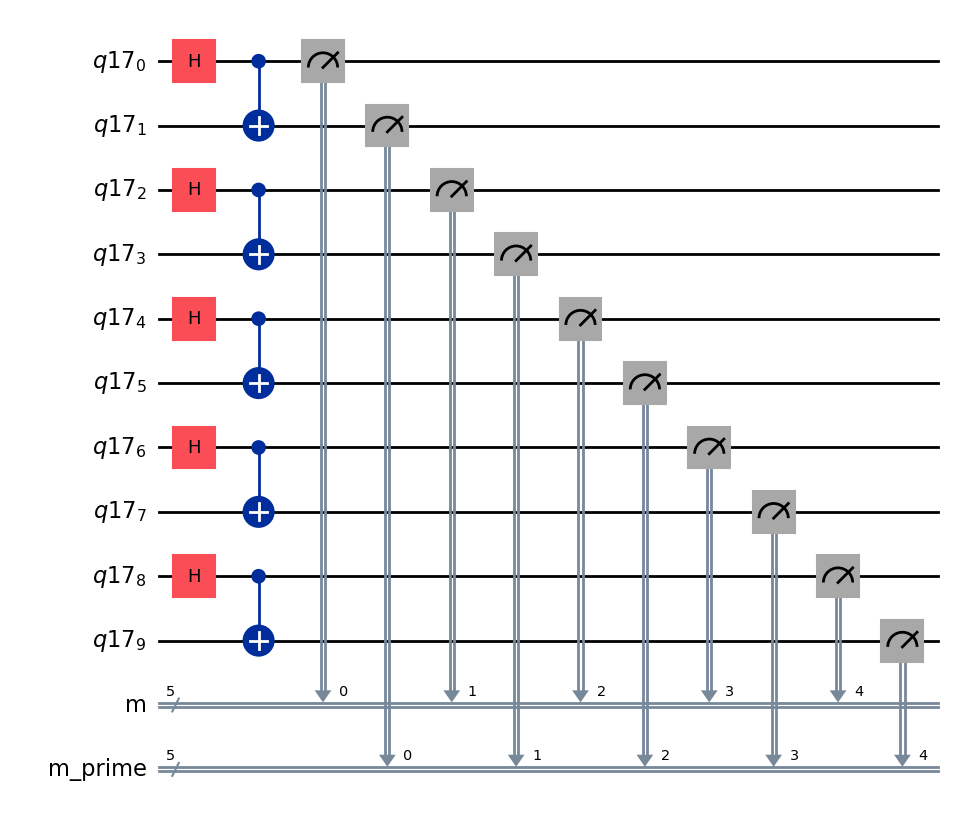

In [33]:
# Step 4 - Rapid-bit Exchange: Entangled particle pair generation and half exchange.

# Bell state creation and measurement
bell_state = create_and_measure_bell_state(num_bits, register_a)
bell_state.draw(output="mpl", style="iqp")

In [34]:
# Extract results from Bell state measurement
measurement_bits, measurement_prime_bits = execute_and_extract_results(bell_state)
print("Measurement Bits:", measurement_bits)
print("Measurement Prime Bits:", measurement_prime_bits)

print(
    "Measurement Bits equal Measurement Prime Bits:",
    np.array_equal(measurement_bits, measurement_prime_bits),
)

Measurement Bits: [0, 0, 1, 1, 0]
Measurement Prime Bits: [0, 0, 1, 1, 0]
Measurement Bits equal Measurement Prime Bits: True


In [35]:
# Party B: XOR operation with the commitment
measurement_prime_xor_r = measurement_prime_bits ^ register_r
print("Measurement Prime Bits XOR r:", measurement_prime_xor_r)

Measurement Prime Bits XOR r: [1 0 1 0 0]


In [36]:
# Step 5 - Measurement and Encoding: Party B measures and encodes the result.

# Encoding and decoding messages with register B
encoded_message = encode_message(measurement_prime_xor_r, register_b, num_bits)
decoded_message_a = decode_message(encoded_message, register_b, num_bits)
print("\nDecoded Message at Party A:", decoded_message_a)


Decoded Message at Party A: [1, 0, 1, 0, 0]


In [37]:
# Conversion to numpy arrays for XOR operations
decoded_message_array_a = np.array(decoded_message_a)
measurement_bits_array = np.array(measurement_bits)

# Party A: XOR operation to obtain r_prime and message encoding
r_prime = decoded_message_array_a ^ measurement_bits_array
encoded_r_prime_message = encode_message(r_prime, register_c, num_bits)

In [38]:
# Step 6 - Reception and XOR: Party A decodes, XORs, and re-encodes the result.

# Party B: Decoding r_prime  and comparison
decoded_r_prime_b = decode_message(encoded_r_prime_message, register_c, num_bits)
print("r_prime equals r at Party B:", np.array_equal(decoded_r_prime_b, register_r))

r_prime equals r at Party B: True


In [39]:
# Step 7 - Protocol Finalization: Party A validates the result.

# Comparing m_bits with m_prime_bits
print(
    "m_bits equals m_prime_bits:",
    np.array_equal(measurement_bits, measurement_prime_bits),
)

m_bits equals m_prime_bits: True


In [40]:
# TODO: Send bits one by one instead of all at once. Loop through bits needed.